In [1]:
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data_dir = 'Alien_data'

In [3]:
# create a feature table from the filtered table
! qiime feature-table summarize \
  --i-table $data_dir/table-filtered.qza \
  --m-sample-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/feature_table.qzv

Saved Visualization to: Alien_data/feature_table.qzv


In [4]:
Visualization.load(f'{data_dir}/feature_table.qzv')

<visualization: Visualization uuid: 3aa507eb-4abc-4457-a511-59a9cbe08848>

In [8]:
# show rarefaction plot (we can also try to increase the depth)
# I was not sure which tree (from the phylogeny section) we should use 
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table-filtered.qza \
    --i-phylogeny $data_dir/sepp-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/sample_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction.qzv

Saved Visualization to: Alien_data/alpha-rarefaction.qzv


In [7]:
Visualization.load(f'{data_dir}/alpha-rarefaction.qzv')

<visualization: Visualization uuid: 72566012-cd1d-40ed-b1ff-ed12b8dba5e6>

In [11]:
# I get the same plot by using the bootstraped tree:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/table-filtered.qza \
    --i-phylogeny $data_dir/raxml-cat-bootstrap-rooted.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/sample_metadata.tsv \
    --o-visualization $data_dir/alpha-rarefaction-rooted.qzv

Saved Visualization to: Alien_data/alpha-rarefaction-rooted.qzv


In [10]:
# sampling depth of 3000 is chosen (we can also discuss which is the best depth to chose)
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/table-filtered.qza \
  --i-phylogeny $data_dir/sepp-tree.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --p-sampling-depth 3000 \
  --output-dir $data_dir/core-metrics-results

Saved FeatureTable[Frequency] to: Alien_data/core-metrics-results/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: Alien_data/core-metrics-results/evenness_vector.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/jaccard_distance_matrix.qza
Saved DistanceMatrix to: Alien_data/core-metrics-results/bray_curtis_distance_matrix.qza
Saved PCoAResults to: Alien_data/core-metrics-results/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: Alien_data/core-metrics-results/weighted_unifrac_pcoa_results.qza
Saved PCo

In [12]:
Visualization.load(f'{data_dir}/alpha-rarefaction-rooted.qzv')

<visualization: Visualization uuid: 1936e801-5a76-44dc-a7db-5933486f0df4>

Test the associations between categorical metadata columns with the corresponding Diversity metrics: 

In [13]:

! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance.qzv


In [14]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: 28ec3684-9a1e-4c21-87bb-f3efa051885b>

In [15]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance.qzv


In [16]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance.qzv')

<visualization: Visualization uuid: 09b8a893-9a86-4142-88fb-30116d6c954a>

In [17]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance.qzv


In [18]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance.qzv')

<visualization: Visualization uuid: b6be221f-2ab8-4b4e-858e-8843f90b2041>

In [19]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance.qzv


In [20]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance.qzv')

<visualization: Visualization uuid: 3ad57e18-9d0e-40a9-ac94-29829ad5aaf9>

Test whether numeric sample metadata columns are correlated with microbial community:
(here I think we should change abduntion to categorical variable instead of using numeric of 0 and 1)

In [21]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/faith_pd_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/faith-pd-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/faith-pd-group-significance-numeric.qzv


In [22]:
Visualization.load(f'{data_dir}/core-metrics-results/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: d31e0d23-d962-44ce-88a3-7229f3077d9d>

In [23]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/observed_features_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/observed-features-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/observed-features-group-significance-numeric.qzv


In [24]:
Visualization.load(f'{data_dir}/core-metrics-results/observed-features-group-significance-numeric.qzv')

<visualization: Visualization uuid: a3dec45a-b440-4aeb-b521-b2624e32f3b3>

In [25]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/shannon_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/shannon-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/shannon-group-significance-numeric.qzv


In [26]:
Visualization.load(f'{data_dir}/core-metrics-results/shannon-group-significance-numeric.qzv')

<visualization: Visualization uuid: 5fe1757d-38cc-4045-a577-aa80702bf297>

In [27]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results/evenness_vector.qza \
  --m-metadata-file $data_dir/sample_metadata.tsv \
  --o-visualization $data_dir/core-metrics-results/evenness-vector-group-significance-numeric.qzv

Saved Visualization to: Alien_data/core-metrics-results/evenness-vector-group-significance-numeric.qzv


In [28]:
Visualization.load(f'{data_dir}/core-metrics-results/evenness-vector-group-significance-numeric.qzv')

<visualization: Visualization uuid: 7c7621c9-6256-4097-8d42-6e696194b589>

In [29]:
div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results/faith_pd_vector.qza')).view(pd.Series)
md = pd.read_csv(os.path.join(data_dir, 'sample_metadata.tsv'), sep='\t', index_col=0)['categorical_time_relative_to_engraftment']
# we can use different columns for md, here I just made an example of 'categorical_time_relative_to_engraftment'

In [30]:
md

sampleid
N4VICF     pre
8A0F9A     pre
5Y49IM    peri
ZKJI45    post
2I7SIQ    peri
          ... 
HCMB0Y     pre
P0A2X1     pre
F89RLS     pre
ZQT8ZN     pre
62ARKK     pre
Name: categorical_time_relative_to_engraftment, Length: 161, dtype: object

In [31]:
md1=md.dropna()
div1=div.dropna()
concat=pd.concat([md1,div1], axis=1, join='inner')
concat

,categorical_time_relative_to_engraftment,faith_pd
N4VICF,pre,9.683136
8A0F9A,pre,9.013610
2I7SIQ,peri,6.356707
PCUMU7,post,6.759979
XO59R8,pre,10.599186
...,...,...
U5Y4NC,pre,7.146660
HCMB0Y,pre,8.361121
P0A2X1,pre,5.662648
F89RLS,pre,5.187369


Text(0, 0.5, 'faith_pd')

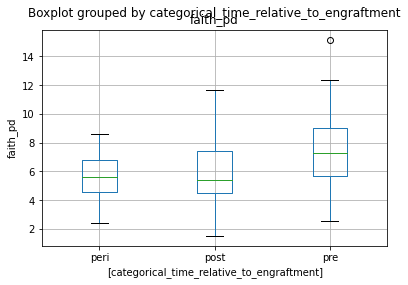

In [32]:
concat.boxplot(by='categorical_time_relative_to_engraftment')
plt.ylabel('faith_pd')